Start with the usual base requirements + potential imports needed and then open the data file we are using.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\welsh\\Desktop\\PF_SITE\\PredTesting\\PredTesting'

In [2]:
%pip install -r jupreqs.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import plotly.express as px
from datetime import datetime
df = pd.read_csv(f"outputs/datasets/collection/VegPrices.csv")
df.head(20)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
5,11-01-2023,35.0,16,18.0,24,25,55,23,6,35.0,30
6,12-01-2023,40.0,16,18.0,22,30,65,23,6,35.0,30
7,15-01-2023,42.0,16,17.0,22,25,65,23,7,35.0,30
8,17-01-2023,35.0,16,18.0,22,30,65,22,10,40.0,35
9,22-01-2023,45.0,16,18.0,22,40,65,25,9,40.0,35


Lets make sure that all of the non-date colums use the same datatype. So we change them all to floats.

In [4]:
vars_to_study = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']
vars_to_study

['Bhindi (Ladies finger)',
 'Tomato',
 'Onion',
 'Potato',
 'Brinjal',
 'Garlic',
 'Peas',
 'Methi',
 'Green Chilli',
 'Elephant Yam (Suran)']

In [5]:
df[vars_to_study] = df[vars_to_study].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    float64
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    float64
 5   Brinjal                 287 non-null    float64
 6   Garlic                  287 non-null    float64
 7   Peas                    287 non-null    float64
 8   Methi                   287 non-null    float64
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    float64
dtypes: float64(10), object(1)
memory usage: 24.8+ KB


Lets quickly have a look and see some extra facts such as the average price for each product.

In [6]:
df[vars_to_study].describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


As we noticed before that the data is in date order but we know the datatype is an object. So we'll need to convert that to datetime before calculating an integer to use for it. We'll first create a new list for it and then replace the current Price Dates column with the new list of values.

In [7]:
new_col = []
for day in df['Price Dates']:
    date1 = datetime(2022, 12, 31)
    date2 = datetime.strptime(day,"%d-%m-%Y")
    delta = date2 - date1
    num_days = delta.days
    day = num_days
    new_col.append(day)

print(new_col)

[1, 2, 3, 4, 8, 11, 12, 15, 17, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 225, 226, 229, 230, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 246, 247, 249, 250, 251, 253, 254, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 267, 268, 269, 270, 271, 274, 275

In [8]:
df['Price Dates'] = new_col
df.head(20)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,1,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0
1,2,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
2,3,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
3,4,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0
4,8,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0
5,11,35.0,16.0,18.0,24.0,25.0,55.0,23.0,6.0,35.0,30.0
6,12,40.0,16.0,18.0,22.0,30.0,65.0,23.0,6.0,35.0,30.0
7,15,42.0,16.0,17.0,22.0,25.0,65.0,23.0,7.0,35.0,30.0
8,17,35.0,16.0,18.0,22.0,30.0,65.0,22.0,10.0,40.0,35.0
9,22,45.0,16.0,18.0,22.0,40.0,65.0,25.0,9.0,40.0,35.0


Lets set up to have a look at some graphs and see what this data can tell us. We'll start with a time series plot.

In [13]:
for i in df[vars_to_study]:
    fig = px.line(df, x=df["Price Dates"], y=i, title='Price of product over time')
    fig.show()



We'll have a quick look to see if we can find any trends to the price changes over the year.

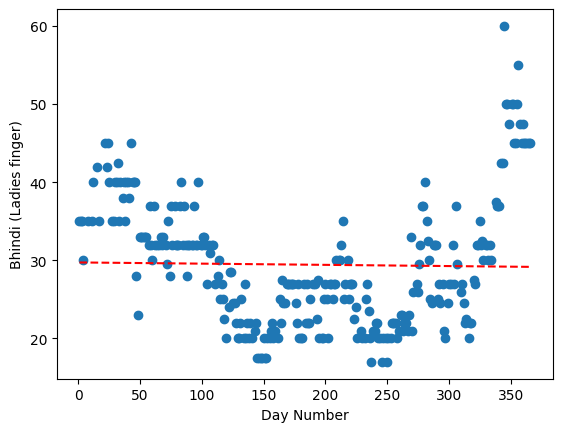

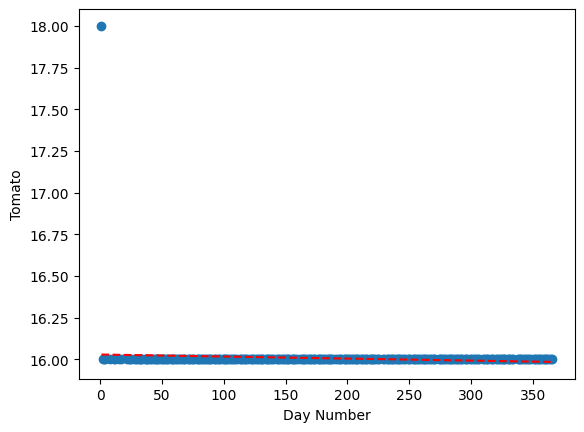

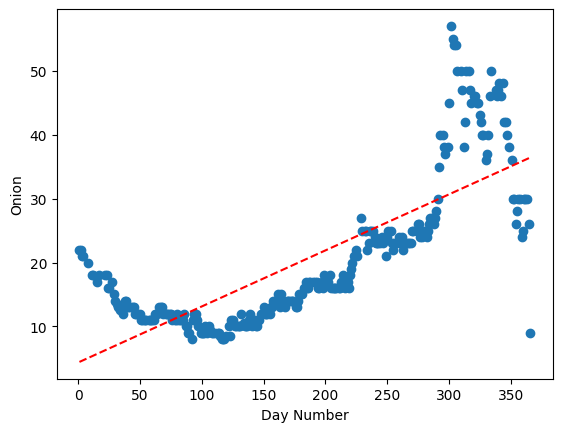

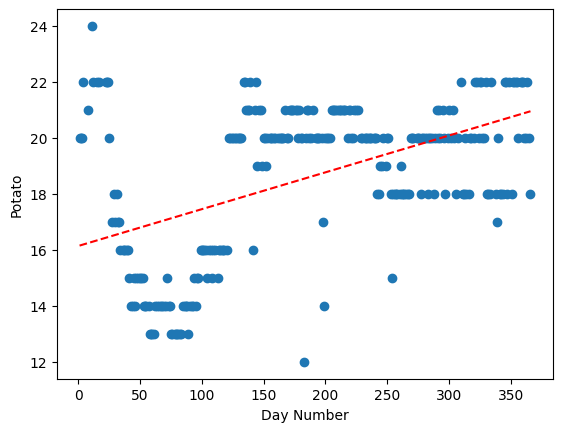

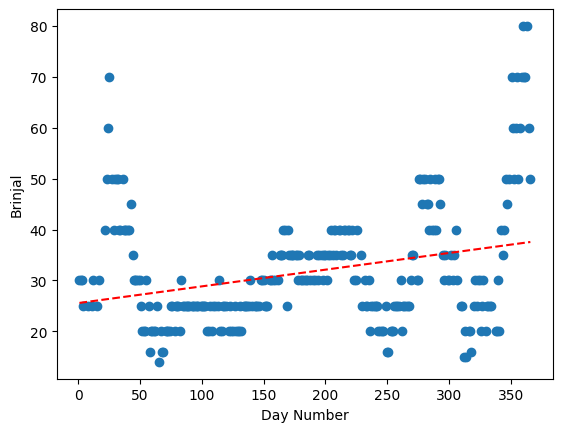

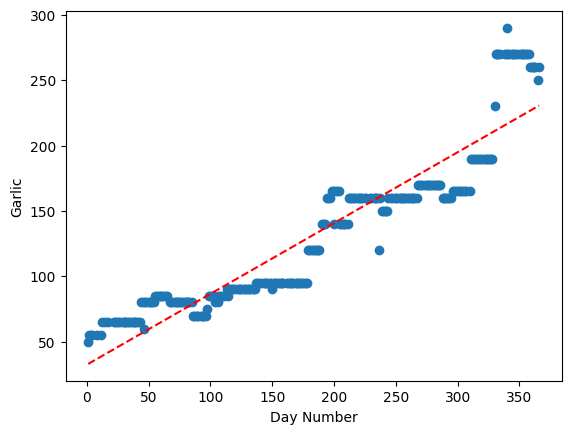

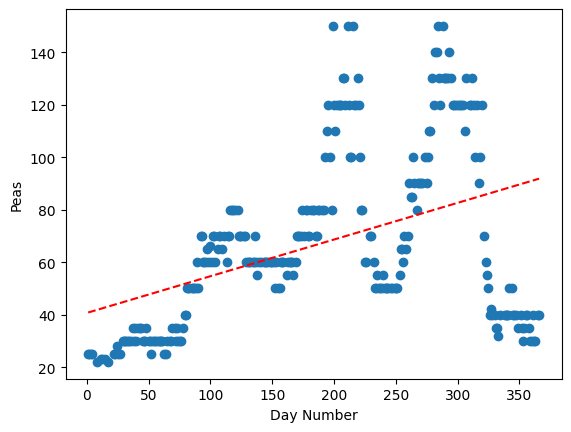

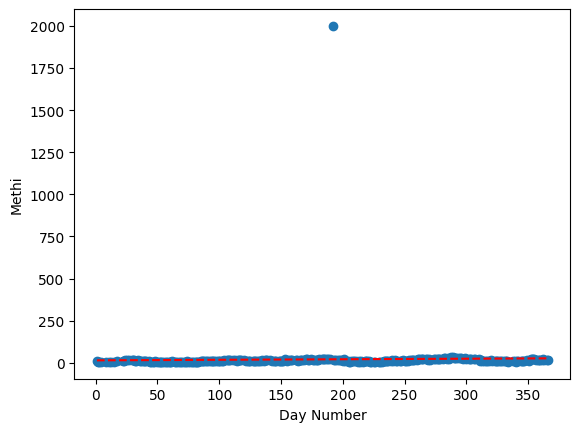

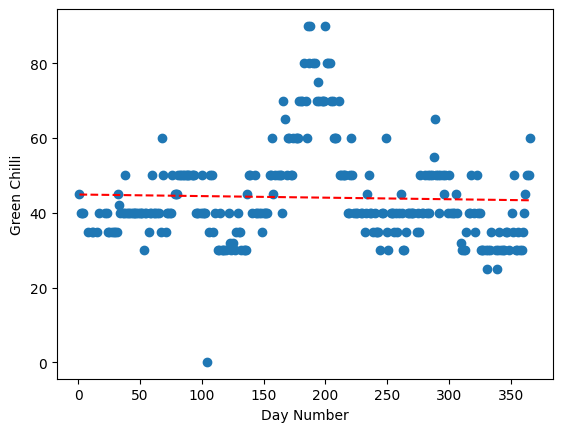

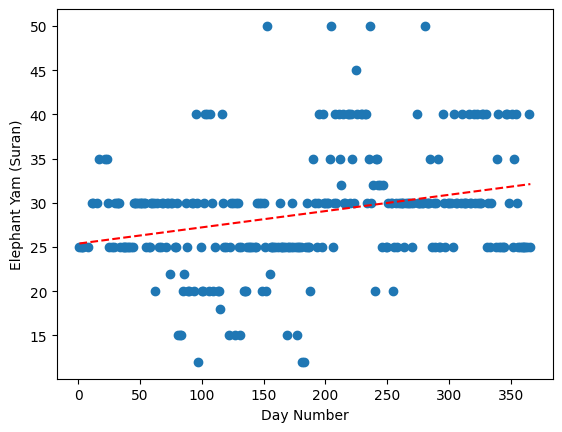

In [20]:
for i in df[vars_to_study]:
    plt.scatter(df["Price Dates"], df[i])
    plt.xlabel("Day Number")
    plt.ylabel(i)

    z = np.polyfit(df["Price Dates"], df[i], 1)
    p = np.poly1d(z)
    plt.plot(df["Price Dates"],p(df["Price Dates"]),"r--")

    plt.show()

As we can see, a few of these didn't really have a changing trend at all, but a few of them had either a positive or a strong positive correlation, meaning that the average price increased over the year and will likely continue to do so if the finacial climate doesn't see any change. However as we cannot predict things things a local economy changes and supply/demand, any predictions made on this data alone would likely be very inaccurate.